# 8. Plotting

* Create a time series plot showing a single data set.
* Create a scatter plot showing the relationship between two data sets.

In [1]:
# Imports
import matplotlib.pyplot as plt

In [2]:
# Magic to render plots inline
%matplotlib inline

In [4]:
# Set up data
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

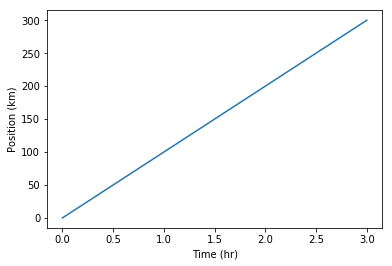

In [8]:
# Plot
plt.plot(time, position)
# Add axis labels
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()

## Plotting directly from a Pandas dataframe

In [9]:
# Imports
import pandas as pd

In [10]:
# Read data
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

In [11]:
# Make year from last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')

In [13]:
# Convert year values to integers
data.columns = years.astype(int)

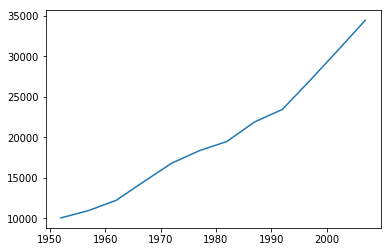

In [15]:
data.loc['Australia'].plot()

## Select, transform and plot data

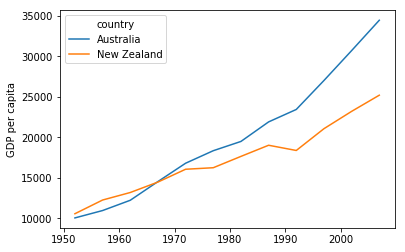

In [16]:
data.T.plot()
plt.ylabel('GDP per capita')
plt.show()

## Different plotting styles

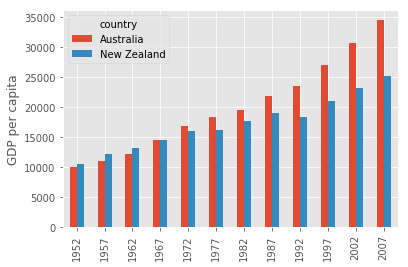

In [17]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()

## Using `plot` from `matplotlib` directly

In [18]:
years = data.columns
gdp_australia = data.loc['Australia']

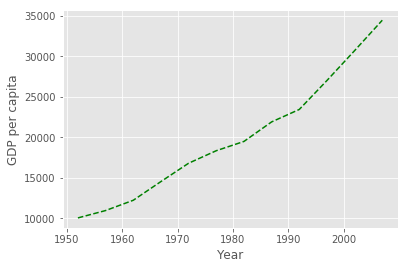

In [20]:
plt.plot(years, gdp_australia, 'g--')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

## Plotting multiple data sets

In [21]:
# Select data for two countries
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

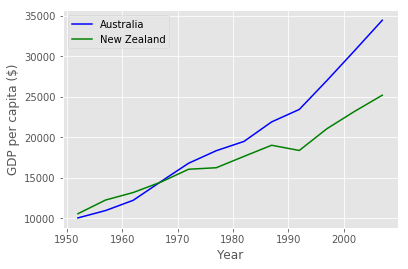

In [22]:
# Plot using markers with different colours
# Add labels for legend
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')
# Create legend in upper left corner
plt.legend(loc='upper left')
# Add axis labels
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')
plt.show()

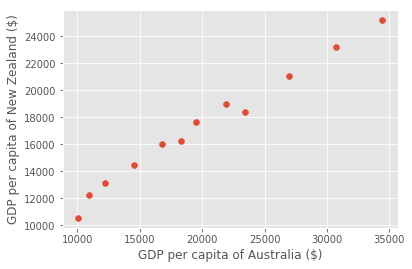

In [23]:
# Plot scatter of australia's gdp against new zealand's gdp
plt.scatter(gdp_australia, gdp_nz)
plt.xlabel('GDP per capita of Australia ($)')
plt.ylabel('GDP per capita of New Zealand ($)')
plt.show()

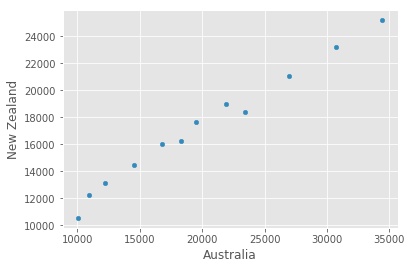

In [24]:
# Transfor data such that columns are countries then scatterplot for aus and nz
data.T.plot.scatter(x='Australia', y='New Zealand')
plt.show()

## Minima and Maxima

In [25]:
# Read in data
data_europe = pd.read_csv('./data/gapminder_gdp_europe.csv', index_col='country')

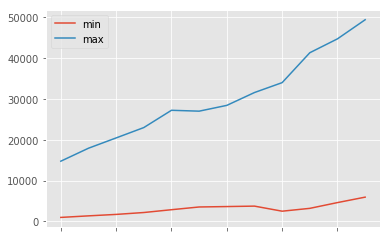

In [26]:
# Plot min GDP per cap over time for all countries in Europe
data_europe.min().plot(label='min')
# Plot max GDP per cap over time for all countries in Europe
data_europe.max().plot(label='max')
# Produce legend with best position
plt.legend(loc='best')
# Rotate xtick by 90 degress
plt.xticks(rotation=90)
plt.show()

## Correlations

In [27]:
# Read data
data_asia = pd.read_csv('./data/gapminder_gdp_asia.csv', index_col='country')

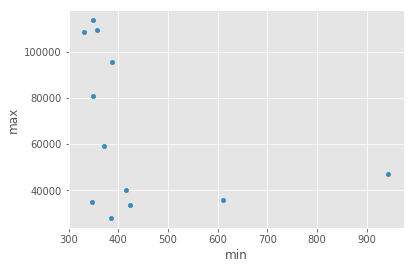

In [28]:
data_asia.describe().T.plot(kind='scatter', x='min', y='max')
plt.show()

No clear correlation between the maximum and minimum GDPs for each year.

In [29]:
# Read data
data_asia = pd.read_csv('./data/gapminder_gdp_asia.csv', index_col='country')

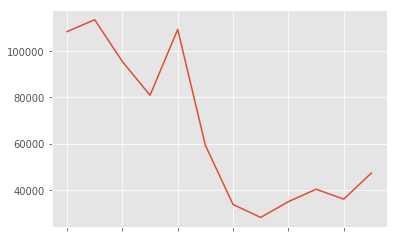

In [33]:
# Plot maxima for each year
data_asia.max().plot()
plt.show()

In [34]:
data_asia.idxmax()

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object

The country with the highest GDP is almost always Kuwait (or Saudi Arabia) - perhaps this is linked to which countries produce oil?

In [35]:
data_asia.idxmin()

gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object

The country with the lowest GDP is always Myanmar.

## More Correlations

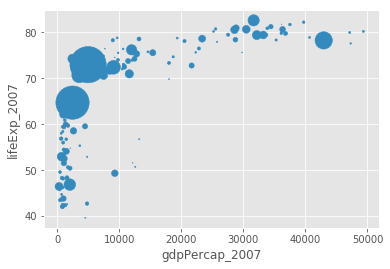

In [36]:
data_all = pd.read_csv('./data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)
plt.show()

* `kind` - type of plot
* `x` - data on x-axis
* `y` - data on y-axis
* `s` - size of points

## Saving plots to file

<Figure size 432x288 with 0 Axes>

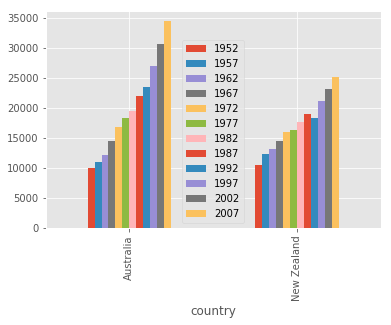

In [37]:
fig = plt.gcf()
data.plot(kind='bar')
fig.savefig('my_figure.png')